# Python Classification Workshop for IoT Related Data

In this notebook, we will:
- read in, clean/tidy, visualize data (preprocessing)
- understand what applications classification is useful for 
- explore different classification models and evaluate performances

In [25]:
# Loading in some basic Python libraries. We will use pandas and matplotlib to begin
import pandas as pd
import matplotlib.pyplot as plt

### What will our dataset be about, exactly?

Phishing is a type of cybercrime where attackers will pretend to be known/trusted entities and send malicious links to users as an attempt to extract sensitive information from them. With stolen information such as passwords or bank details, the attacker can access accounts, steal identities/data, and download all types of malware onto the user's computer. Typically, the attacker will do this by suggesting that there are has been suspicious activity on one of your accounts, issues with an invoice, or that you need to log in to your account again to verify it. In order to prevent these phishing attempts, researchers and experts have been analyzing features and applying classification models that help identify phishing links. 

Similarly, this is what we would like to accomplish with our dataset and using our knowledge of Python. This dataset contains 48 columns that detail the features collected from the URL of 5000 phishing pages and 5000 legitimate pages. The 'CLASS_LABEL' column, which tells us whether the link is phishing or legitimate, is binary (0 or 1) and uniformly distributed (even split between 0 and 1). This data was collected from January to May 2015 and from May to June 2017 using the Selenium WebDriver, a browser automation framework that allows for more precise and robust feature extraction.

If you would like to read more about this dataset and access it for yourself, you can do so through this link: https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning

In [26]:
# Reading the csv dataset into our Python environment
df = pd.read_csv('Phishing_Legitimate_full.csv')
df.head() # Only first few rows of data for viewing clarity

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


### Let's obtain a quick summary of the features in our dataset using ```.info()``` and ```.describe()```!

In [27]:
feats_df = df.drop(columns=['id','CLASS_LABEL']) # Splitting off label column to create separate dataframe of just features

In [28]:
# Concise Dataset Summary
print(feats_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

As you can see from the summary above, our features dataset has:
- 48 columns and 10000 rows
- 45 int64 columns and 3 float64 columns
- no missing values from columns! Each column has 10000 non-null values!

In [29]:
# Descriptive Statistics Analysis
print(feats_df.describe())

            NumDots  SubdomainLevel     PathLevel     UrlLength       NumDash  \
count  10000.000000    10000.000000  10000.000000  10000.000000  10000.000000   
mean       2.445100        0.586800      3.300300     70.264100      1.818000   
std        1.346836        0.751214      1.863241     33.369877      3.106258   
min        1.000000        0.000000      0.000000     12.000000      0.000000   
25%        2.000000        0.000000      2.000000     48.000000      0.000000   
50%        2.000000        1.000000      3.000000     62.000000      0.000000   
75%        3.000000        1.000000      4.000000     84.000000      2.000000   
max       21.000000       14.000000     18.000000    253.000000     55.000000   

       NumDashInHostname      AtSymbol   TildeSymbol  NumUnderscore  \
count       10000.000000  10000.000000  10000.000000    10000.00000   
mean            0.138900      0.000300      0.013100        0.32320   
std             0.545744      0.017319      0.113709     

Running ```.describe()``` gives us a descriptive statistics summary of the features dataset, displaying information such as the count, mean, std, min, max, etc. of the columns with numerical data. These statistics can help identify patterns between certain classes and determine outliers that may be affecting the results of our models.

### Preprocessing for Binary Classification

To start, let's use ```df['CLASS_LABEL'].value_counts()``` to determine the distribution in the 'CLASS_LABEL' column from our dataset. We expect to see a binary classification, as each entry in the 'CLASS_LABEL' column describes either a phishing link or a legitimate one. We can also confirm that there are 5000 of each case, as stated in the dataset description.

In [30]:
# Viewing occurrences of each class in label column
df['CLASS_LABEL'].value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

This is what we want! A balance between these classes will give the applied classification models equal training on both the phishing URLs and legitimate URLs from our dataset. 

However, data collection is not always as simple as this. Often times, the data will contain an uneven distribution between classes and will need to be resampled in order to handle this.

Luckily in our case, we already have balanced classes!

##### Let's do a quick visualization of this!

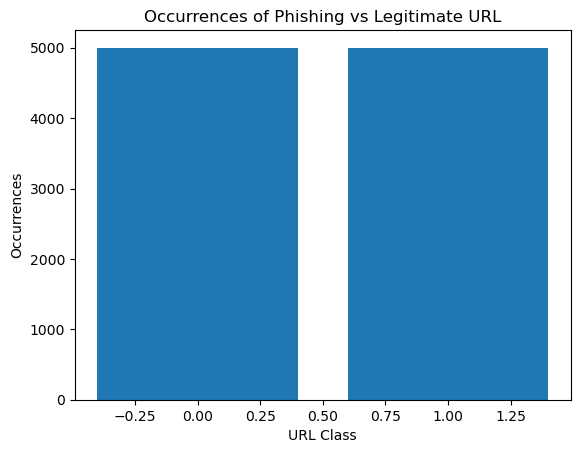

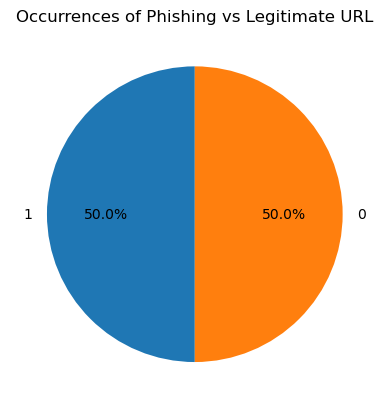

In [31]:
# Data Visualization Analysis
label_data = df['CLASS_LABEL'].value_counts()

# Bar Plot
plt.bar(label_data.index, label_data.values)
plt.xlabel('URL Class')
plt.ylabel('Occurrences')
plt.title('Occurrences of Phishing vs Legitimate URL')
plt.show()

# Pie Plot
plt.pie(label_data, labels=label_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Occurrences of Phishing vs Legitimate URL')
plt.show()

Next, let's run the ```df.corr()['CLASS_LABEL']``` method to obtain numerical, pairwise correlation values between the feature columns to the target column. In our case, the target being the 'CLASS_LABEL' column. 

In [32]:
# Provide us correlation values
df.corr()['CLASS_LABEL'] * 100

id                                    -86.602541
NumDots                                29.411137
SubdomainLevel                          4.313235
PathLevel                              22.945039
UrlLength                              -7.449306
NumDash                               -37.223492
NumDashInHostname                      15.044434
AtSymbol                               -1.732311
TildeSymbol                             9.586372
NumUnderscore                          -9.886921
NumPercent                             -6.846490
NumQueryComponents                    -14.739070
NumAmpersand                           -8.144632
NumHash                                 4.801356
NumNumericChars                         1.912160
NoHttps                                -7.221881
RandomString                           -8.530842
IpAddress                              13.229141
DomainInSubdomains                     10.045238
DomainInPaths                         -11.820117
HttpsInHostname     

The positive values here imply a positive correlation to the target, while the negative values imply a negative correlation to the target. The magnitude of the values imply how strong of a correlation there is to the target. 

Preprocessing is always a crucial step to make sure we can draw meaningful analyses from the data. Now, we can begin applying our classification models!

### Dummy Classifier Model

The Dummy Classifier is the baseline model for classification from the sklearn library. Baseline models like the Dummy Classifier are frequently used in binary classification problems as they are simplisitic/easy to implement, providing us with a better understanding of the data and a benchmark for evaluating more complex classification models. 

Dummy Classifiers work by using a predetermined strategy to analyze the training data and make predictions. By default, its strategy is to predict the most frequent class observed in the training data.

If you would like to read more about the Dummy Classifier, take a look at sklearn's documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

There is a general procedure for working with classifier models:
1. Read the data
2. Create training and testing data for both your features (X) and target variable (y). The target variable in this case would be a categorical variable (classes).
3. Next step is to create the classifier object. This could be a dummy classifier, logistic regression, K-nearest neighbours, SVMs (support vector machines), and more.
4. Fit the classifier.
5. Predict on new examples (X_test).
6. Score the model, by comparing the predictions from X_test using your model against true values of the y_test.

Let's take a look at how we would approach these steps one-by-one using a Dummy Classifier! We have already read the data into our Python environment, so let's begin at step 2!

#### Step 2:

We separate our features and target column, then use the train_test_split module from sklearn to split 80% of our data for training and 20% of our data for testing.

In [33]:
from sklearn.model_selection import train_test_split

# Performing a train-test split on the data for our model to use
X = feats_df
y = df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3 & 4:

Upon importing the classification model we would like to use into our Python environment, we create an object for it and fit our training data. This is how we would do so with the Dummy Classifier model:

In [34]:
# Import the Dummy Classifier 
from sklearn.dummy import DummyClassifier 

# Creating/Fitting Object for Dummy Classifier Model
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

#### Step 5 & 6:

Now that our model has learned from the training data, we can use our X_test data to make predictions and then compare it to our y_test data to evaluate how accurate our model really was. Using ```model.score()``` will automate this whole process and evaluate the R^2 score, a measure of variance, to calculate the accuracy rate.

In [35]:
# Making Predictions + Evaluating Performance
print("The accuracy of the model on the training data: %0.3f" % (dummy_clf.score(X_test, y_test)))

The accuracy of the model on the training data: 0.494


We see that this classification model is able to predict phishing links with an accuracy of 49.4%. Though this is rather low, it makes sense as our Dummy Classifier model wants to predict the majority class from the training data, but since both classes are evenly distributed, we essentially have a random guess.

### Logistic Regression Model

Logistic Regression is another statistical analysis method that is used to predict the probability of a binary outcome (true/false, yes/no, etc.) based on the input variables that are passed in. Though it is called "regression", this algorithm is used in conducting classification tasks. It fits a logistic/sigmoid curve to the data, modelling the probability of an input belonging to a class and mapping the range between 0 and 1. By tuning the parameters through training, the logistic regression model will attempt to minimize the differences between our predictions and the actual testing data. 

This method works by summing each input features' associated weight (impact on outcome probability) and comparing it to a threshold value (commonly set as 0.5 in binary classification). If the total weight value is above the threshold, the logistic regression model determines that it is part of the positive class (phishing link, in our case) and if it is below the threshold, the model determines that it is part of the negative class (legitimate link, in our case).

You can read more about logistic regression from sklearn's documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let's try to follow the procedure to working with classifier models again, this time implementing the Logistic Regression model!

#### Step 2:

We can accomplish this in the same way as we did for the Dummy Classifier. Let's perform an 80% split for the training data and 20% split for the testing data again.

In [36]:
# Performing a train-test split on the data for our model to use
X = feats_df
y = df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3 & 4:

This time importing the Logistic Regression module from sklearn, let's create an object for the model and fit our testing data to it.

In [37]:
# Import the Logistic Regression
from sklearn.linear_model import LogisticRegression

# Creating/Fitting Object for Logistic Regression Model 
lr_clf = LogisticRegression(max_iter=2000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

#### Step 5 & 6:

Running ```.score``` will automate the process of making predictions and evaluating the accuracy rate. Let's run this to see how this model compares to the last.

In [38]:
# Making Predictions + Evaluating Performance
print("The accuracy of the model on the training data: %0.3f" % (lr_clf.score(X_test,y_test)))

The accuracy of the model on the training data: 0.938


The Logistic Regression model seems to be much better than the Dummy Classifier model! Using the Logistic Regression model to classify phishing links from legitimate ones yields an accuracy rate of 93.8%.

### K-Neighbors Classifier Model

The K-Neighbors Classifier is a voting-style algorithm from sklearn that makes predictions for the classification of an input based on the classes of its k-nearest neighboring data points in the training data. The class that seems to appear most frequently out of these k-nearest neighbors is assigned to be the predicted class of the data input in question. It essentially functions through the idea that similar data points tend to belong to similar classes. 

By default, KNeighborsClassifier() uses 5 neighbors for queries, but you can modify the number of neighbors this algorithm considers by editing the n_neighbors parameter (e.g. model = KNeighborsClassifier(n_neighbors = 3)). It's a good idea to try playing around with this parameter to see how it changes the model performance, but make sure you consider an odd amount of neighbors to avoid ties! 

Additionally, keep in mind that having a small k value (e.g. n_neighbors=1) can lead to overfitting, which means that the model is over-sensitive to noise/outliers in the data and misses the pattern for predicting new data. Vice versa, having a k value too large can lead to underfitting, which causes the model to overly generalize the patterns in the data, missing some of the crucial variations that help make accurate predictions about the pattern for predicting new data.

Using this link, you can read more about the K-Neighbors Classifier from the sklearn documentation if you are curious: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Like the other classification models seen before, the K-Neighbors Classifier will also follow the same general procedure for working with classifier models. Let's try to implement this!

#### Step 2:

In [39]:
# Performing a train-test split on the data for our model to use
X = feats_df
y = df['CLASS_LABEL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 3 & 4:

In [40]:
# Import the K-Neighbors Classifier Model
from sklearn.neighbors import KNeighborsClassifier

# Creating/Fitting Object for K-Neighbors Classifier Model 
knn_clf = KNeighborsClassifier(n_neighbors=7) # Try playing with the n_neighbors parameter
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#### Step 5 & 6:

In [41]:
# Making Predictions + Evaluating Performance
print("The accuracy of the model on the training data: %0.3f" % (knn_clf.score(X_test,y_test)))

The accuracy of the model on the training data: 0.864


The K-Neighbors Classifier model with n_neighbors=7 is able to distinguish between phishing URLs and legitimate URLs with an accuracy of 86.4%! This is much better than the Dummy Classifier, but slightly worse than the Logistic Regression model!

#### Optimizing n_neighbors using GridSearchCV!

Rather than manually adjusting and tuning the n_neighbors parameter for the K-Neighbors Classifier model, we can use techniques such as GridSearchCV to optimize the n_neighbors value so that it yields the highest accuracy rate. 

GridSearchCV is a cross-validation algorithm that works by retraining our model several times on a range of parameter values specified by the user. In doing so, we can see how that parameter affects our classification model and find the values for that parameter that maximize the accuracy.

For example, since we want to find the optimal n_neighbors value in our problem, we will set a range of values for this parameter using numpy. Then, we will use the GridSearchCV algorithm to determine which n_neighbors value yields the best results like so:

In [42]:
# Importing Python libraries needed for GridSearchCV
import numpy as np
from sklearn.model_selection import GridSearchCV

In [43]:
# Create new instance of the KNeighborsClassifier model
knn2 = KNeighborsClassifier()

# Setting range of n_neighbors values to try
param_grid = {'n_neighbors': np.arange(1, 25)}

In [44]:
# Applying GridSearchCV to KNeighborsClassifier for n_neighbors 1-25
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X,y) # X = feats_df, y = df['CLASS_LABEL']

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [45]:
knn_gscv.best_params_

{'n_neighbors': 3}

We can see that GridSearchCV determined n_neighbors=3 to be the optimal parameter value for the K-Neighbors Classifier. 

In [46]:
# Creating/Fitting Object for K-Neighbors Classifier Model 
knn_clf = KNeighborsClassifier(n_neighbors=3) # Try playing with the n_neighbors parameter
knn_clf.fit(X_train, y_train)

# Making Predictions + Evaluating Performance
print("The accuracy of the model on the training data: %0.3f" % (knn_clf.score(X_test,y_test)))

The accuracy of the model on the training data: 0.868


Using the optimal value for n_neighbors found by the GridSearchCV algorithm, the accuracy rate of our K-Neighbors Classifier model has now increased to 86.8%! 

### Your turn! Linear Support Vector Classifier (SVC) Model

Using what you've learned by following along with the other classification models above, do you think you can try implementing one on your own? Let's try the Support Vector Machine - more specifically the Linear Support Vector Classifier model!

When configured with a linear kernel: ```SVC(kernel='linear')```, the SVC model will attempt to find a straight-line decision boundary, known as a hyperplane, that best separates the classes based on the input features. It does this by using its algorithm to maximize the margin (separation) between the positive and negative class data points closest to the hyperplane. In our case, the positive and negative class correspond to phishing and legitimate links, respectively. The data points that help optimize the margin are called support vectors, hence the name of the model.  

If you would like, you can read more about Support Vector Machines/Classification from sklearn's documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Give it a try on your own first and you can take a look at the answer key after by uncommenting the code block below! How does the Linear SVC model compare to some of the other models we tried? Which model gave us the best results?

It is important to try a variety of models and update parameters as needed to achieve a classification model that makes predictions as accurately as possible.

In [47]:
# Import the Support Vector Classifier Model
from sklearn.svm import SVC

In [48]:
# Answer Key - Uncomment code below to see the results!

# # Performing a train-test split on the data for our model to use
# X = feats_df
# y = df['CLASS_LABEL']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Creating/Fitting Object for Support Vector Classifier Model 
# sv_clf = SVC(kernel='linear')
# sv_clf.fit(X_train, y_train)

# # Making Predictions + Evaluating Performance
# print("The accuracy of the model on the training data: %0.3f" % (sv_clf.score(X_test,y_test)))

Classification is an important technique used by data analysts to help categorize data based on a set of input features and determine relationships between variables. This type of analysis can be useful in various applications of IoT data. In this notebook for example, you saw how anti-phishing researchers use classification techniques to detect and prevent phishing attempts. 